### Cyberbullying Plots

In [184]:
import pandas as pd
df_cyberbullying = pd.read_csv("cyberplots.csv")

In [185]:
df_cyberbullying.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56277 entries, 0 to 56276
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          56277 non-null  object
 1   cyberbullying_type  56277 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 879.5+ KB


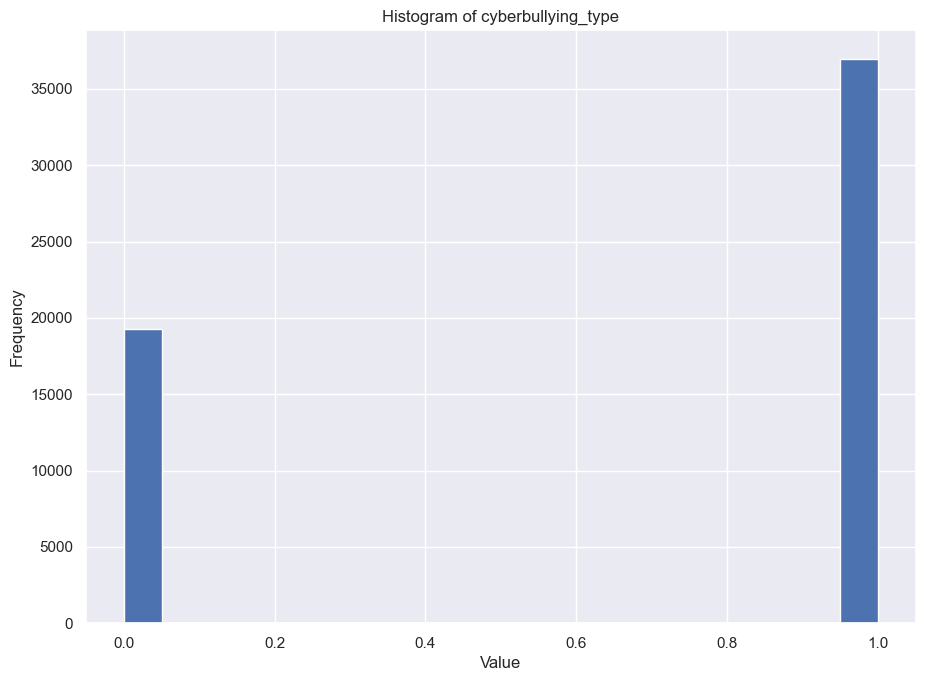

In [186]:
import matplotlib.pyplot as plt

# Create a histogram of the variable
plt.hist(df_cyberbullying['cyberbullying_type'], bins=20)

# Add a title and labels
plt.title("Histogram of cyberbullying_type")
plt.xlabel("Value")
plt.ylabel("Frequency")

# Show the plot
plt.show()

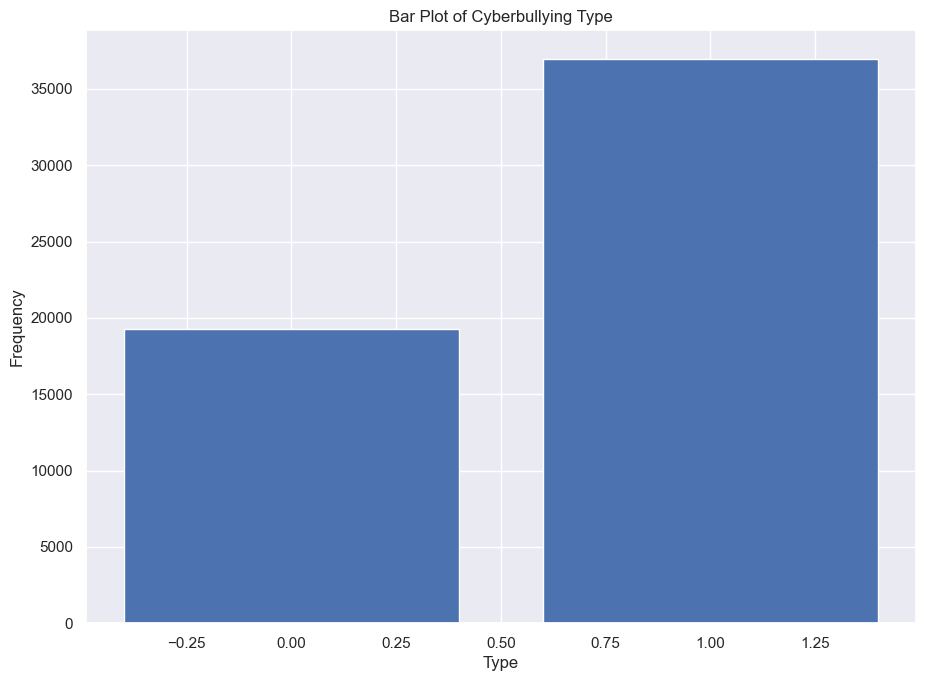

In [187]:
import matplotlib.pyplot as plt

# Count the number of occurrences of each category
counts = df_cyberbullying['cyberbullying_type'].value_counts()

# Plot the bar chart
plt.bar(counts.index, counts.values)

# Add a title and labels
plt.title("Bar Plot of Cyberbullying Type")
plt.xlabel("Type")
plt.ylabel("Frequency")

# Show the plot
plt.show()

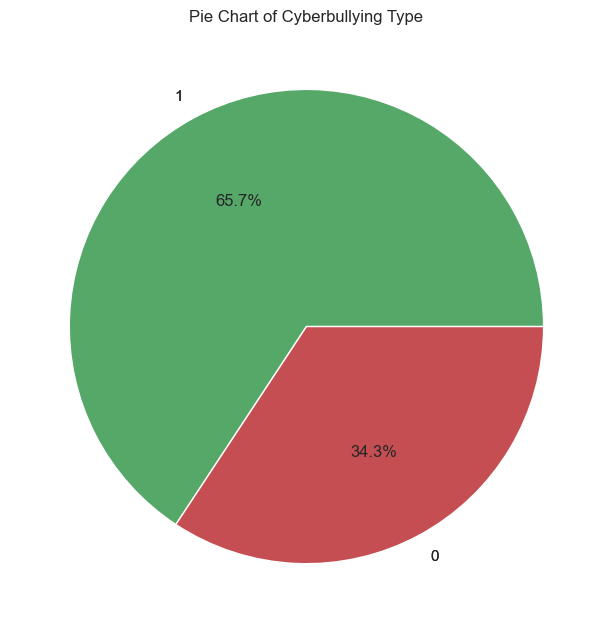

In [188]:
import matplotlib.pyplot as plt

# Count the number of occurrences of each category
counts = df_cyberbullying['cyberbullying_type'].value_counts()

# Plot the pie chart
plt.pie(counts.values, labels=counts.index)

# Add a title
plt.title("Pie Chart of Cyberbullying Type")
plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%')
# Show the plot
plt.show()

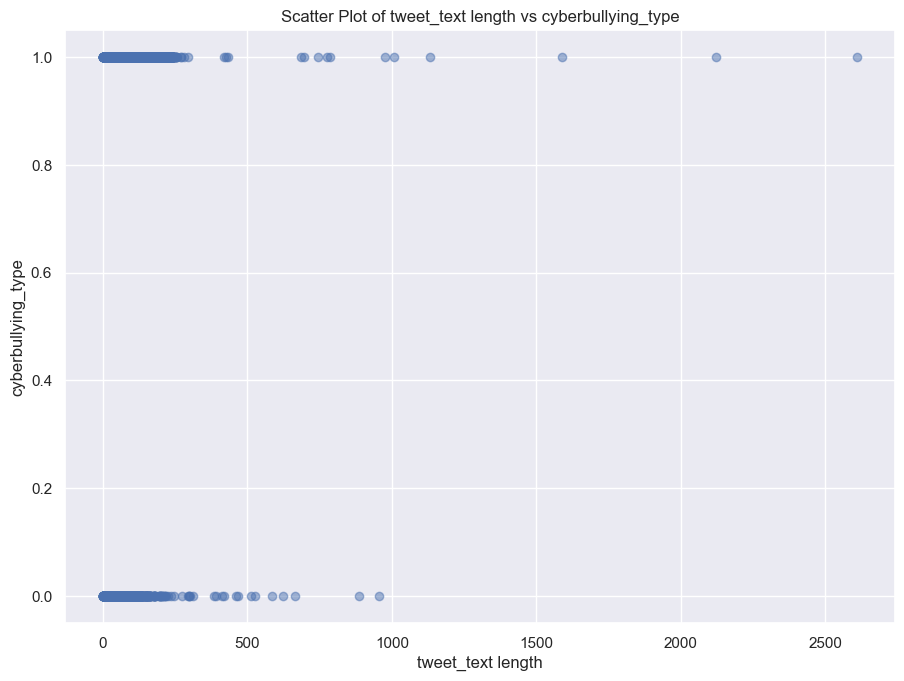

In [189]:
import matplotlib.pyplot as plt

# Create a new column with tweet_text length
df_cyberbullying['text_length'] = df_cyberbullying['tweet_text'].apply(len)

# Create a scatter plot of the two variables
plt.scatter(df_cyberbullying['text_length'], df_cyberbullying['cyberbullying_type'], alpha=0.5)

# Add a title and labels
plt.title("Scatter Plot of tweet_text length vs cyberbullying_type")
plt.xlabel("tweet_text length")
plt.ylabel("cyberbullying_type")

# Show the plot
plt.show()

In [190]:
df =df_cyberbullying.drop(columns='text_length', axis=0)

In [191]:
df.head()

,tweet_text,cyberbullying_type
0,classy whore red velvet cupcakes,0
1,meh p thanks heads concerned another angry dud...,0
2,yes test god good bad indifferent weird whatev...,0
3,karma hope bites kat butt nasty,0
4,rebecca black drops school due bullying,0


In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56277 entries, 0 to 56276
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          56277 non-null  object
 1   cyberbullying_type  56277 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 879.5+ KB


In [193]:
df.shape

(56277, 2)

In [194]:
df.tweet_text.duplicated().sum()

1868

In [195]:
df.duplicated(subset=['tweet_text','cyberbullying_type']).sum()

0

In [196]:
df.tweet_text.duplicated().sum()

1868

In [197]:
df.duplicated(subset='tweet_text').sum()

1868

In [198]:
df = df.drop_duplicates(subset='tweet_text')

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54409 entries, 0 to 56276
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          54409 non-null  object
 1   cyberbullying_type  54409 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.2+ MB


In [200]:
df['cyberbullying_type'].value_counts()

1    36261
0    18148
Name: cyberbullying_type, dtype: int64

[Text(0.5, 1.0, 'Graph of Dataset')]

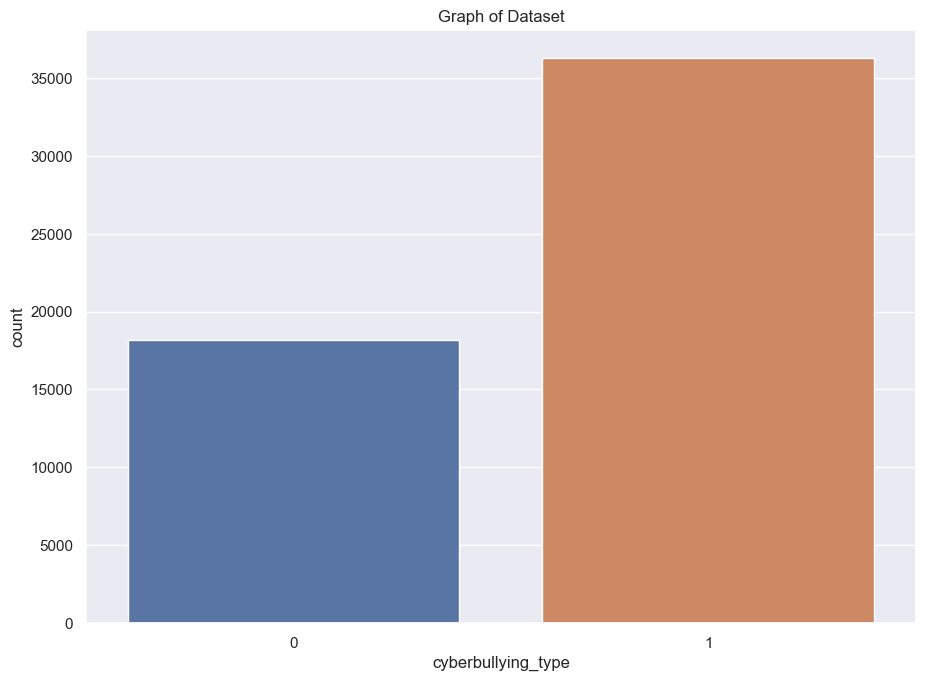

In [201]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10.7,7.7)})
sns.countplot(x='cyberbullying_type',data=df).set(title="Graph of Dataset")

In [202]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\giann\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\giann\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [203]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [204]:
df.dropna(axis = 0)

,tweet_text,cyberbullying_type
0,classy whore red velvet cupcakes,0
1,meh p thanks heads concerned another angry dud...,0
2,yes test god good bad indifferent weird whatev...,0
3,karma hope bites kat butt nasty,0
4,rebecca black drops school due bullying,0
...,...,...
56272,loving credit crunch,0
56273,thats killing smile flattered,0
56274,agree awful makes sense regardless last mistak...,0
56275,called yesterday guidance counselors office th...,0


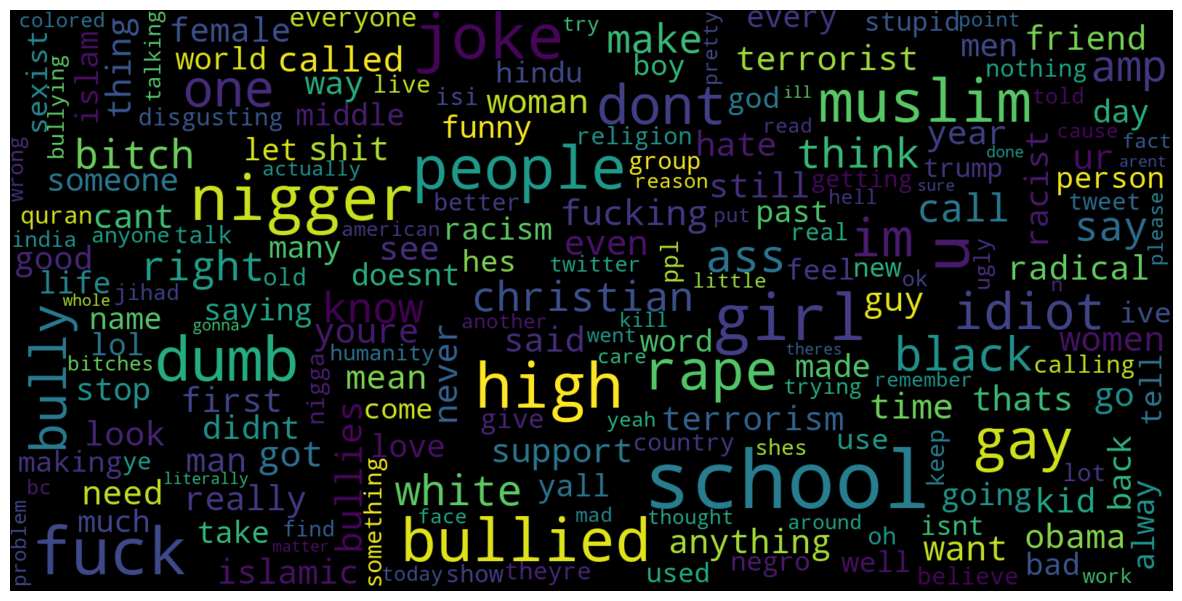

In [205]:
# Cyberbullying
consolidated = ' '.join(
    word for word in df['tweet_text'][df['cyberbullying_type'] == 1].astype(str))
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

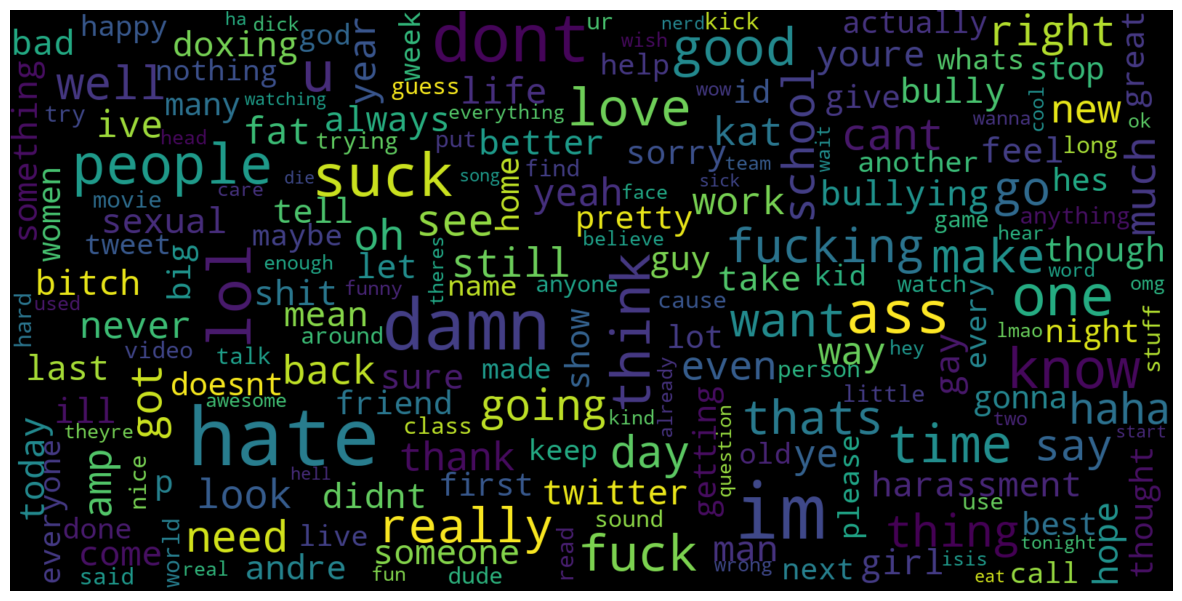

In [206]:
# Not Cyberbullying
consolidated = ' '.join(
    word for word in df['tweet_text'][df['cyberbullying_type'] == 0].astype(str))
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

<AxesSubplot: title={'center': 'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

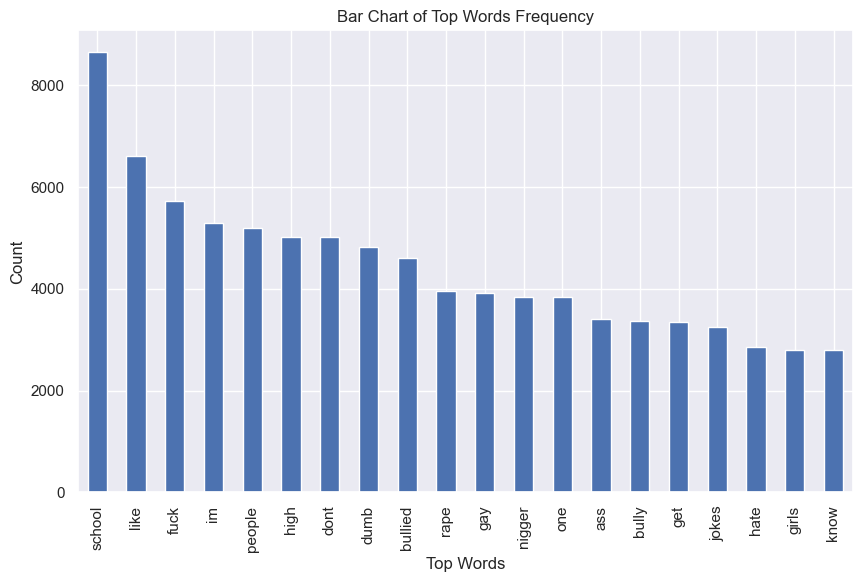

In [207]:
from sklearn.feature_extraction.text import CountVectorizer


def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1],
                        reverse=True)
    return words_freq[:n]


common_words = get_top_n_words(df['tweet_text'].astype('U'), 20)
df1 = pd.DataFrame(common_words, columns=['Review', 'count'])

df1.groupby('Review').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10, 6),
    xlabel="Top Words",
    ylabel="Count",
    title="Bar Chart of Top Words Frequency"
)

In [208]:
X = df['tweet_text']
y = df['cyberbullying_type']

In [209]:
X.shape

(54409,)

In [210]:
y.shape

(54409,)

In [211]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [212]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_train = TfidfVectorizer()
X_train = tf_train.fit_transform(X_train)
X_test = tf_train.transform(X_test)

In [213]:
print(X_train)

  (0, 18204)	0.5407314198904429
  (0, 29525)	0.5821826714108161
  (0, 22131)	0.19178840946496536
  (0, 10795)	0.2969609460357709
  (0, 12430)	0.3179293084897579
  (0, 11043)	0.37765755120200417
  (1, 21577)	0.2345681516591072
  (1, 14917)	0.12029866777610769
  (1, 38483)	0.1802105807458968
  (1, 28450)	0.11348521425645622
  (1, 5327)	0.11406973045653507
  (1, 9343)	0.16225939055938376
  (1, 25972)	0.19004699251235235
  (1, 41524)	0.18901050845415557
  (1, 38871)	0.3640568302154182
  (1, 2924)	0.15592398809818256
  (1, 30561)	0.25027963969330275
  (1, 33922)	0.20590151159694642
  (1, 14042)	0.2369155384450824
  (1, 41439)	0.20277957013590206
  (1, 31359)	0.44590692555089056
  (1, 22137)	0.22348557367706975
  (1, 15316)	0.13099291622591283
  (1, 14365)	0.17113925432726707
  (1, 33539)	0.19141763375185325
  :	:
  (43525, 36715)	0.39763269895204945
  (43525, 34077)	0.3002652991505018
  (43525, 42508)	0.31225421479963456
  (43525, 35747)	0.3229019304949396
  (43525, 25757)	0.213290594066860

In [214]:
print(X_test)

  (0, 37790)	0.3847292329243877
  (0, 35631)	0.3473249336112455
  (0, 33398)	0.21219379468487196
  (0, 31359)	0.3306560247353043
  (0, 30580)	0.27305317818762886
  (0, 29706)	0.4388325365227017
  (0, 26742)	0.23800159914337146
  (0, 26077)	0.17859407542957662
  (0, 18407)	0.1659363664760314
  (0, 14465)	0.16112467394183952
  (0, 11310)	0.16771968570863544
  (0, 4116)	0.2070952746073719
  (0, 3833)	0.24891480913422193
  (0, 2340)	0.18666437852148218
  (1, 42670)	0.4235788675333346
  (1, 42281)	0.4188362281809745
  (1, 40551)	0.26587756446042377
  (1, 30010)	0.49401601111721005
  (1, 18164)	0.3548516703968024
  (1, 15577)	0.2581345403656737
  (1, 4642)	0.3712967943647609
  (2, 38612)	0.7872545030444221
  (2, 29342)	0.5459989708538088
  (2, 16733)	0.28655797190596816
  (3, 26077)	0.2918511111291504
  :	:
  (10880, 31431)	0.3212797334717817
  (10880, 20773)	0.3335438846752267
  (10880, 16640)	0.2639601858210143
  (10880, 16602)	0.2685374405807349
  (10880, 15131)	0.36594997816399827
  (108

In [215]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print(accuracy_score(predictions, y_test))

0.8626171659621393


In [217]:
from sklearn.metrics import classification_report
print(classification_report( model.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       0.79      0.80      0.80      3673
           1       0.90      0.89      0.90      7209

    accuracy                           0.86     10882
   macro avg       0.85      0.85      0.85     10882
weighted avg       0.86      0.86      0.86     10882



In [218]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# testing the model
print(accuracy_score(y_train, model.predict(X_train)))
print(accuracy_score(y_test, model.predict(X_test)))

0.9998621545247777
0.8365190222385591


In [220]:
from sklearn.ensemble import RandomForestClassifier

# n_estimators = number of decision trees
model = RandomForestClassifier(n_estimators=30)
model.fit(X_train, y_train)
# testing the model
print(accuracy_score(y_train, model.predict(X_train)))
print(accuracy_score(y_test, model.predict(X_test)))

0.9992418498862775
0.8541628377136555


In [221]:
import xgboost as xgb

model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train,y_train)
print(accuracy_score(y_train, model.predict(X_train)))
print(accuracy_score(y_test, model.predict(X_test)))

C:\Users\giann\DataspellProjects\CBDA\venv\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


0.8766972224136743
0.8628928505789377


In [222]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)
print(accuracy_score(y_train, model.predict(X_train)))
print(accuracy_score(y_test, model.predict(X_test)))

0.8228685643393756
0.752159529498254


In [223]:
from sklearn.svm import SVC
model = SVC(kernel='linear')

model.fit(X_train, y_train)
print(accuracy_score(y_train, model.predict(X_train)))
print(accuracy_score(y_test, model.predict(X_test)))

0.9342017598272336
0.8701525454879617


In [226]:
models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

In [227]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy, precision, recall = {}, {}, {}

for key in models.keys():

    # Fit the classifier
    models[key].fit(X_train, y_train)

    # Make predictions
    predictions = models[key].predict(X_test)

    # Calculate metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)

In [228]:
import pandas as pd

df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

,Accuracy,Precision,Recall
Logistic Regression,0.862617,0.897800,0.894438
Support Vector Machines,0.863628,0.898079,0.895585
Decision Trees,0.834314,0.896129,0.858935
Random Forest,0.858666,0.900028,0.887424


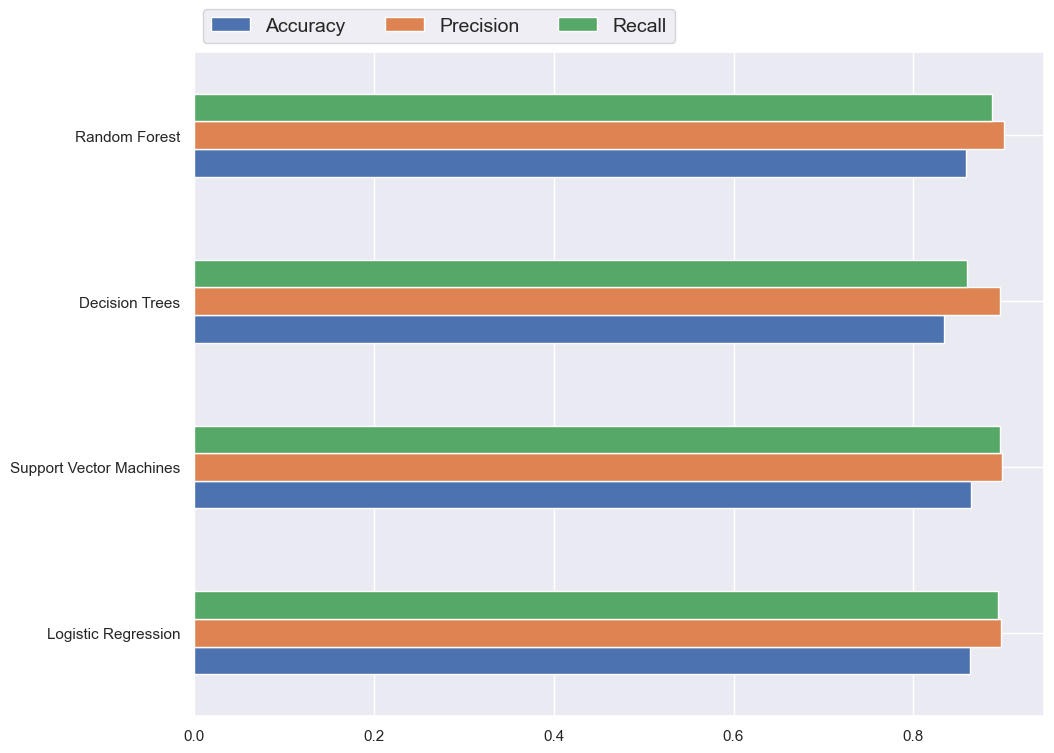

In [229]:
ax = df_model.plot.barh()
ax.legend(
    ncol=len(models.keys()),
    bbox_to_anchor=(0, 1),
    loc='lower left',
    prop={'size': 14}
)
plt.tight_layout()